In [2]:
import pandas as pd  
data = pd.read_excel("Uniprot_AMP_classifier.xlsx")

In [45]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# To ignore specific types of warnings
# For example, to ignore DeprecationWarnings:
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [12]:
from peptides import Peptide
peptide = Peptide("SDKEVDEVDAALSDLEITLE")
peptide.descriptors()

{'BLOSUM1': 0.3670000000000001,
 'BLOSUM2': -0.43599999999999994,
 'BLOSUM3': -0.23900000000000002,
 'BLOSUM4': 0.014499999999999996,
 'BLOSUM5': -0.2535,
 'BLOSUM6': 0.164,
 'BLOSUM7': -0.4525,
 'BLOSUM8': 0.036,
 'BLOSUM9': 0.28650000000000003,
 'BLOSUM10': 0.05299999999999999,
 'PP1': 0.10099999999999998,
 'PP2': -0.5120000000000001,
 'PP3': -0.3005,
 'F1': -0.5061500000000001,
 'F2': 0.4427999999999999,
 'F3': -0.26525,
 'F4': 0.6630999999999999,
 'F5': 0.0879,
 'F6': -0.4891,
 'KF1': -0.5195000000000001,
 'KF2': -0.354,
 'KF3': -0.4124999999999999,
 'KF4': 0.284,
 'KF5': -0.5475,
 'KF6': -0.46849999999999997,
 'KF7': -0.44000000000000006,
 'KF8': -0.097,
 'KF9': 0.008500000000000013,
 'KF10': 0.2,
 'MSWHIM1': -0.39399999999999996,
 'MSWHIM2': 0.078,
 'MSWHIM3': -0.471,
 'E1': 0.05595,
 'E2': -0.019950000000000002,
 'E3': -0.18060000000000004,
 'E4': -0.027600000000000003,
 'E5': 0.07089999999999999,
 'PD1': -0.6529999999999999,
 'PD2': 0.10949999999999997,
 'ProtFP1': -1.461500000

In [15]:
dict(peptide.descriptors())

{'BLOSUM1': 0.3670000000000001,
 'BLOSUM2': -0.43599999999999994,
 'BLOSUM3': -0.23900000000000002,
 'BLOSUM4': 0.014499999999999996,
 'BLOSUM5': -0.2535,
 'BLOSUM6': 0.164,
 'BLOSUM7': -0.4525,
 'BLOSUM8': 0.036,
 'BLOSUM9': 0.28650000000000003,
 'BLOSUM10': 0.05299999999999999,
 'PP1': 0.10099999999999998,
 'PP2': -0.5120000000000001,
 'PP3': -0.3005,
 'F1': -0.5061500000000001,
 'F2': 0.4427999999999999,
 'F3': -0.26525,
 'F4': 0.6630999999999999,
 'F5': 0.0879,
 'F6': -0.4891,
 'KF1': -0.5195000000000001,
 'KF2': -0.354,
 'KF3': -0.4124999999999999,
 'KF4': 0.284,
 'KF5': -0.5475,
 'KF6': -0.46849999999999997,
 'KF7': -0.44000000000000006,
 'KF8': -0.097,
 'KF9': 0.008500000000000013,
 'KF10': 0.2,
 'MSWHIM1': -0.39399999999999996,
 'MSWHIM2': 0.078,
 'MSWHIM3': -0.471,
 'E1': 0.05595,
 'E2': -0.019950000000000002,
 'E3': -0.18060000000000004,
 'E4': -0.027600000000000003,
 'E5': 0.07089999999999999,
 'PD1': -0.6529999999999999,
 'PD2': 0.10949999999999997,
 'ProtFP1': -1.461500000

In [16]:
for key, value in dict(peptide.descriptors()):
        print(key, value)

ValueError: too many values to unpack (expected 2)

In [ ]:
for key in peptide.descriptors().keys():
    data[key] = None
for i in range(len(data)):
    peptide = Peptide(data['Sequence'].iloc[i])
    for key, value in peptide.descriptors().items():
        data[key].iloc[i] = value
    

In [19]:
data.to_excel('descriptors.xlsx')

In [8]:
descriptor_data = pd.read_excel('descriptors.xlsx')

In [9]:
label_column = descriptor_data['Label']  # Extract the 'Label' column

# Drop the 'Label' column from the DataFrame
descriptor_data.drop(columns=['Label'], inplace=True)

# Append the 'Label' column at the end of the DataFrame
descriptor_data['Label'] = label_column

# Optionally, if you want to reset the index after manipulation
descriptor_data.reset_index(drop=True, inplace=True)

In [11]:
descriptor_data.head()

,Unnamed: 0.1,Unnamed: 0,Sequence,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,VHSE5,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5,Label
0,0,0,MLADEEITEALQHCNQPRCDILTSMAYQIGVAGLAGFHKMLEAICD...,0.210114,-0.177841,-0.099432,-0.081136,-0.020227,0.066364,-0.134545,...,-0.370227,-0.160795,0.071591,-0.071818,0.336250,-0.425000,0.033068,-0.587955,0.157273,Non-Antimicrobial
1,1,1,MTKSMSFTIFLVFFMLIGMKLGMAKTCVKPHNNPLCEFHECNHLCV...,-0.027727,-0.212159,-0.054545,0.185455,0.059659,0.059091,0.050227,...,0.005227,-0.022159,-0.034318,-0.025682,-0.119205,-0.398523,0.280682,-0.030114,-0.004659,Non-Antimicrobial
2,2,2,MKLTCVLIITVLFLTACQLTTAVTYSRGEHKHRALMSTGTNYRLPK...,0.005405,-0.277162,-0.135811,0.034189,0.286892,0.064730,0.100676,...,0.263649,0.084189,0.019595,0.095405,0.318784,-0.384189,-0.526486,-0.036892,-0.125000,Antimicrobial
3,3,3,GVVPHDFRI,-0.036667,-0.148889,-0.173333,0.196667,-0.388889,-0.057778,0.181111,...,-0.018889,-0.287778,0.234444,0.430000,-0.325556,-0.386667,-0.315556,0.145556,0.210000,Non-Antimicrobial
4,4,4,GLFSKPAGKGIKNLIPKGVKHIGKEVGKDVIRTGIDVAGCKIKGEC,0.223478,-0.334783,0.051087,-0.035652,-0.064565,0.220870,0.206957,...,0.105000,-0.397174,0.656522,-0.111087,0.386522,-1.138478,-0.514348,-0.237826,0.130652,Non-Antimicrobial


In [13]:
descriptor_data = descriptor_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [19]:
descriptor_data

,Sequence,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,...,VHSE5,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5,Label
0,MLADEEITEALQHCNQPRCDILTSMAYQIGVAGLAGFHKMLEAICD...,0.210114,-0.177841,-0.099432,-0.081136,-0.020227,0.066364,-0.134545,0.029659,0.253068,...,-0.370227,-0.160795,0.071591,-0.071818,0.336250,-0.425000,0.033068,-0.587955,0.157273,Non-Antimicrobial
1,MTKSMSFTIFLVFFMLIGMKLGMAKTCVKPHNNPLCEFHECNHLCV...,-0.027727,-0.212159,-0.054545,0.185455,0.059659,0.059091,0.050227,-0.059432,-0.065568,...,0.005227,-0.022159,-0.034318,-0.025682,-0.119205,-0.398523,0.280682,-0.030114,-0.004659,Non-Antimicrobial
2,MKLTCVLIITVLFLTACQLTTAVTYSRGEHKHRALMSTGTNYRLPK...,0.005405,-0.277162,-0.135811,0.034189,0.286892,0.064730,0.100676,-0.205000,0.078378,...,0.263649,0.084189,0.019595,0.095405,0.318784,-0.384189,-0.526486,-0.036892,-0.125000,Antimicrobial
3,GVVPHDFRI,-0.036667,-0.148889,-0.173333,0.196667,-0.388889,-0.057778,0.181111,0.165556,-0.028889,...,-0.018889,-0.287778,0.234444,0.430000,-0.325556,-0.386667,-0.315556,0.145556,0.210000,Non-Antimicrobial
4,GLFSKPAGKGIKNLIPKGVKHIGKEVGKDVIRTGIDVAGCKIKGEC,0.223478,-0.334783,0.051087,-0.035652,-0.064565,0.220870,0.206957,0.199783,0.064783,...,0.105000,-0.397174,0.656522,-0.111087,0.386522,-1.138478,-0.514348,-0.237826,0.130652,Non-Antimicrobial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,MNNSMISPSVVDLLEKIHDRYSLVILTSKRARQIIEGAEPQISIKS...,0.179444,-0.365417,-0.333194,-0.007778,-0.101806,0.151944,-0.074583,-0.016389,0.094167,...,-0.181389,-0.312917,0.212222,0.021111,0.094028,-0.505833,-0.477222,-0.714444,0.405694,Antimicrobial
17996,MGSFSIWHWLIVLVIVMLVFGTKKLRNIGQDLGGAVKGFKDGMKTF...,0.108767,-0.226986,-0.174658,-0.103699,-0.074932,0.262603,0.003151,0.018219,0.128767,...,-0.010959,-0.273973,0.253151,-0.177397,0.004110,-0.667945,-0.521918,-0.389589,0.186164,Antimicrobial
17997,MATKLVCSFAVFFILFLVIFEVPEIEAQDTECLVEYGGDVGFAFCA...,-0.091531,-0.258367,0.005816,0.110918,-0.059082,0.028776,-0.023163,0.063265,0.116429,...,-0.132755,-0.222245,-0.017755,-0.007653,-0.285306,-0.585816,0.185714,-0.505510,-0.011735,Non-Antimicrobial
17998,MDFLKKSLFLVLFLGFFSLSICEEEKRETEEKENEQEDDREERREE...,0.208657,-0.222836,-0.342388,-0.104030,0.009552,0.194925,-0.116418,0.098060,0.185224,...,-0.253134,-0.175821,0.309254,-0.067463,0.288209,-0.282836,-0.489701,-0.716119,0.184328,Non-Antimicrobial


In [15]:
descriptor_data.to_excel('descriptors.xlsx')

In [26]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
descriptor_data['Label'] = le.fit_transform(descriptor_data['Label'])

In [27]:
from sklearn.model_selection import train_test_split
X = descriptor_data.drop(columns=['Label', 'Sequence'])
y = descriptor_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
y_train

12637    0
3396     0
7132     0
12128    1
15109    0
        ..
13888    0
4610     1
8721     0
152      0
9705     1
Name: Label, Length: 14400, dtype: int32

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# Supervised Learning Models
svm_classifier = SVC()  # Support Vector Machine Classifier
logistic_regression = LogisticRegression()  # Logistic Regression

# Unsupervised Learning Models
kmeans = KMeans()  # KMeans Clustering

# Train the models
svm_classifier.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
kmeans.fit(X_train)

# Predictions (optional)
svm_predictions = svm_classifier.predict(X_test)
logistic_regression_predictions = logistic_regression.predict(X_test)
kmeans_clusters = kmeans.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Calculate accuracy for Logistic Regression
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)



c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

SVM Accuracy: 0.8469444444444445
Logistic Regression Accuracy: 0.7963888888888889


In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for pca_value in [5, 10, 20]:
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=pca_value)  # Specify the number of components you want to keep
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)

    # Train a model (for example, SVM) using the PCA-transformed features
    svm_classifier = SVC()
    logistic_regression = LogisticRegression()  # Logistic Regression
    svm_classifier.fit(x_train_pca, y_train)
    logistic_regression.fit(x_train_pca, y_train)
    # Make predictions
    svm_predictions = svm_classifier.predict(x_test_pca)

    # Predictions (optional)
    svm_predictions = svm_classifier.predict(x_test_pca)
    logistic_regression_predictions = logistic_regression.predict(x_test_pca)
    print(f"Number of PCA components : {pca_value}")
    # Calculate accuracy for SVM
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print("SVM Accuracy:", svm_accuracy)

    # Calculate accuracy for Logistic Regression
    logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
    print("Logistic Regression Accuracy:", logistic_regression_accuracy)


Number of PCA components : 5
SVM Accuracy: 0.7886111111111112
Logistic Regression Accuracy: 0.7169444444444445
Number of PCA components : 10
SVM Accuracy: 0.855
Logistic Regression Accuracy: 0.7430555555555556
Number of PCA components : 20
SVM Accuracy: 0.8811111111111111
Logistic Regression Accuracy: 0.7969444444444445


In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.01]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = best_xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Accuracy: 0.9066666666666666


In [52]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier(
    iterations=300,       # Number of boosting iterations
    depth=6,             # Maximum depth of each tree
    learning_rate=0.1    # Learning rate
)

# Train the CatBoost classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions
catboost_predictions = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, catboost_predictions)
print("Accuracy:", accuracy)


0:	learn: 0.6421174	total: 15.3ms	remaining: 4.56s
1:	learn: 0.5967229	total: 27.8ms	remaining: 4.14s
2:	learn: 0.5575640	total: 40.2ms	remaining: 3.98s
3:	learn: 0.5293579	total: 53.9ms	remaining: 3.99s
4:	learn: 0.5045126	total: 65.2ms	remaining: 3.84s
5:	learn: 0.4852228	total: 76.7ms	remaining: 3.76s
6:	learn: 0.4696872	total: 89.7ms	remaining: 3.75s
7:	learn: 0.4547864	total: 100ms	remaining: 3.65s
8:	learn: 0.4436318	total: 110ms	remaining: 3.57s
9:	learn: 0.4332188	total: 121ms	remaining: 3.52s
10:	learn: 0.4250529	total: 132ms	remaining: 3.46s
11:	learn: 0.4173894	total: 141ms	remaining: 3.38s
12:	learn: 0.4105311	total: 150ms	remaining: 3.32s
13:	learn: 0.4031548	total: 159ms	remaining: 3.26s
14:	learn: 0.3965936	total: 170ms	remaining: 3.23s
15:	learn: 0.3907174	total: 183ms	remaining: 3.25s
16:	learn: 0.3866411	total: 196ms	remaining: 3.26s
17:	learn: 0.3826026	total: 208ms	remaining: 3.26s
18:	learn: 0.3787239	total: 219ms	remaining: 3.24s
19:	learn: 0.3737831	total: 251ms	

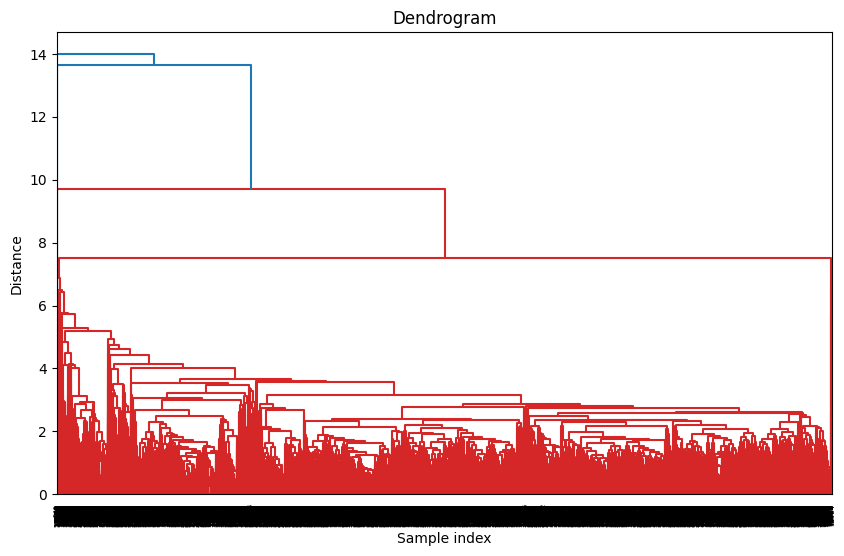

In [57]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(x_train_pca, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
